<a href="https://colab.research.google.com/github/KajariBhaumik/BasketballShootingAnalysis/blob/main/4_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/Basketball_computer_vision

/content/drive/My Drive/Basketball_computer_vision


In [3]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
# os.mkdir("test")
# vdo_name_test = '01232023101323'
# vdo_file = "SpinVideos/Copy of " + vdo_name_test + ".MOV"
# test = cv2.VideoCapture(vdo_file)
# c = 0
# while True:
#     ret, frame= test.read() #ret= if the image is read then it will be true; if it can not read the image, "ret" will be false
#     if ret == False:
#       break
#     else:
#       file_name = f"test/{vdo_name_test}_image_{c}.png"
#       cv2.imwrite(file_name, frame)
#       c = c+1

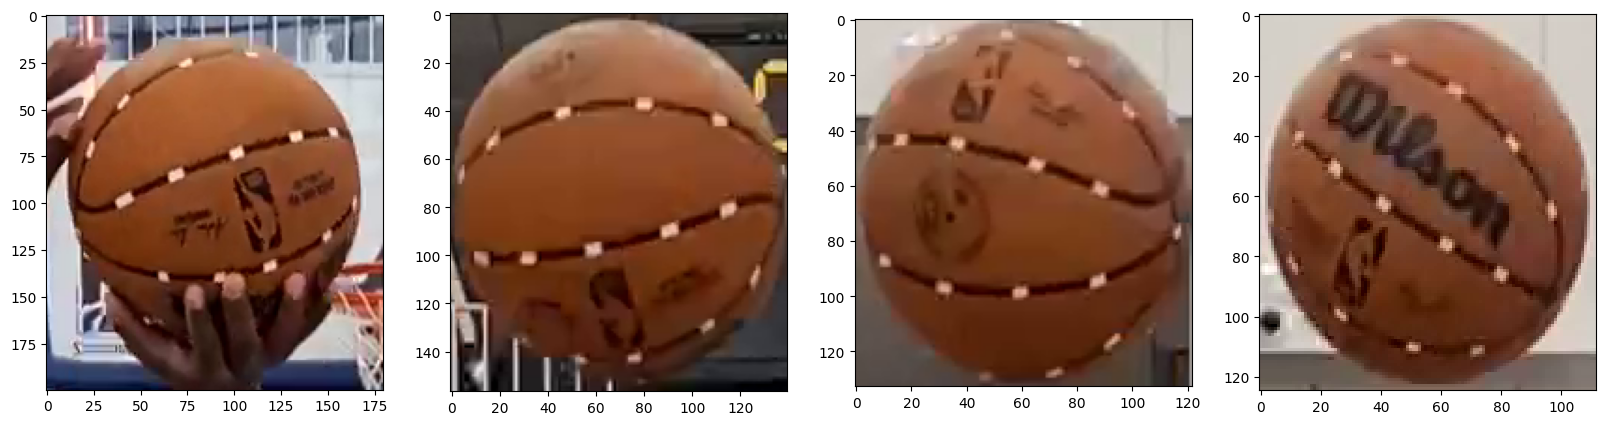

In [4]:
vdo_name_test = '01232023101323'
img1 = cv2.imread(f"frame_images/{vdo_name_test}/image_{130}.png")
img2 = cv2.imread(f"frame_images/{vdo_name_test}/image_{140}.png")
img3 = cv2.imread(f"frame_images/{vdo_name_test}/image_{150}.png")
img4 = cv2.imread(f"frame_images/{vdo_name_test}/image_{160}.png")

img1_crop = img1[500:700, 340:520]
img2_crop = img2[273:430, 370:510]
img3_crop = img3[122:255, 395:517]
img4_crop = img4[45:170, 413:525]

f, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(cv2.cvtColor(img1_crop, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(img2_crop, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(img3_crop, cv2.COLOR_BGR2RGB))
axs[3].imshow(cv2.cvtColor(img4_crop, cv2.COLOR_BGR2RGB))
plt.show()

# Image Processing

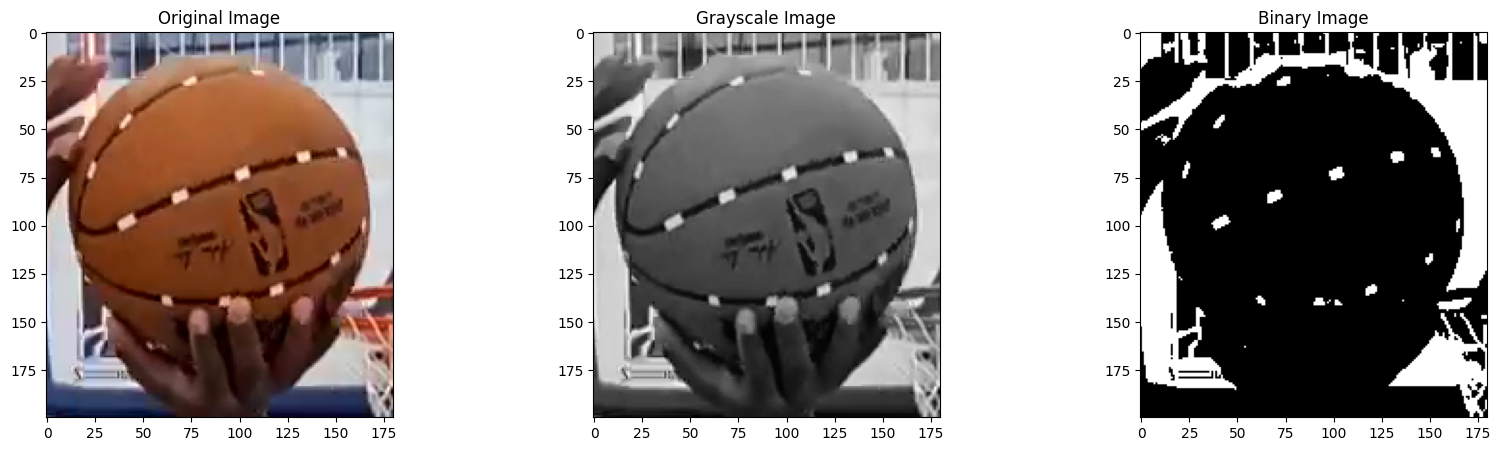

In [10]:
# Load images
img1 = img1_crop.copy() # First frame

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

_, binary_img1 = cv2.threshold(gray1, 150, 255, cv2.THRESH_BINARY)


f, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)); axs[0].set_title("Original Image")
axs[1].imshow(gray1, cmap='gray'); axs[1].set_title("Grayscale Image")
axs[2].imshow(binary_img1, cmap='gray'); axs[2].set_title("Binary Image")
plt.show()
# # Step 2: Perform edge detection using Canny
# edges1 = cv2.Canny(gray1, 100, 200)  # Canny thresholds can be adjusted
# edges2 = cv2.Canny(gray2, 100, 200)

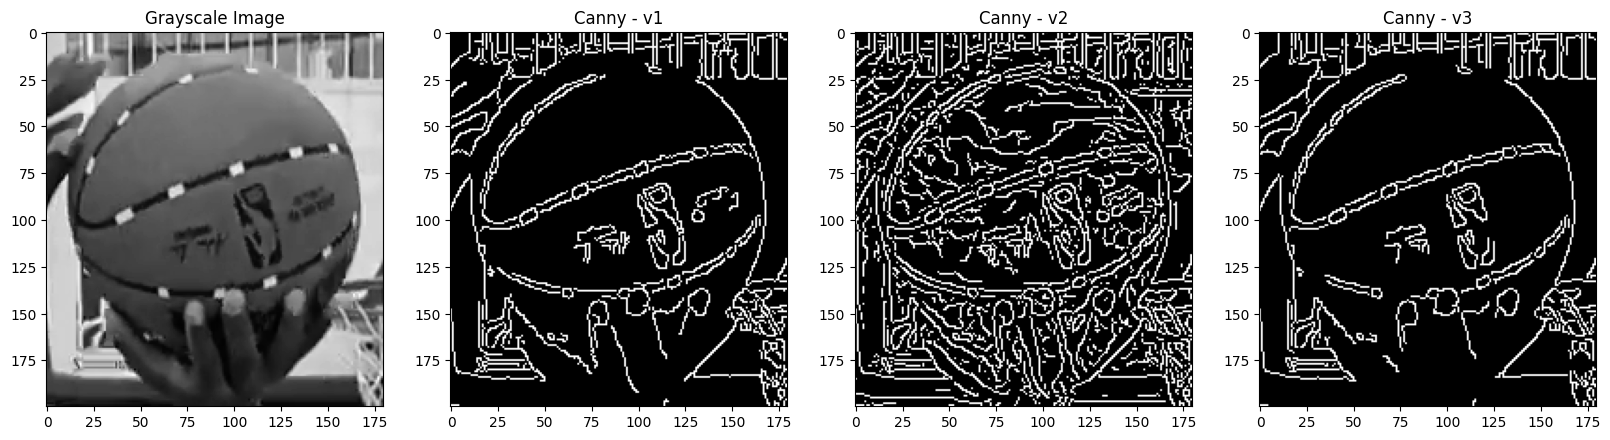

In [22]:
edges1 = cv2.Canny(gray1, 100, 200)  # Canny thresholds with default apertureSize=3
edges2 = cv2.Canny(gray1, 100, 200, apertureSize=5)
edges3 = cv2.Canny(gray1, 100, 200, apertureSize=3, L2gradient = True)

f, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(gray1, cmap='gray'); axs[0].set_title("Grayscale Image")
axs[1].imshow(edges1, cmap='gray'); axs[1].set_title("Canny - v1")
axs[2].imshow(edges2, cmap='gray'); axs[2].set_title("Canny - v2")
axs[3].imshow(edges3, cmap='gray'); axs[3].set_title("Canny - v3")
plt.show()

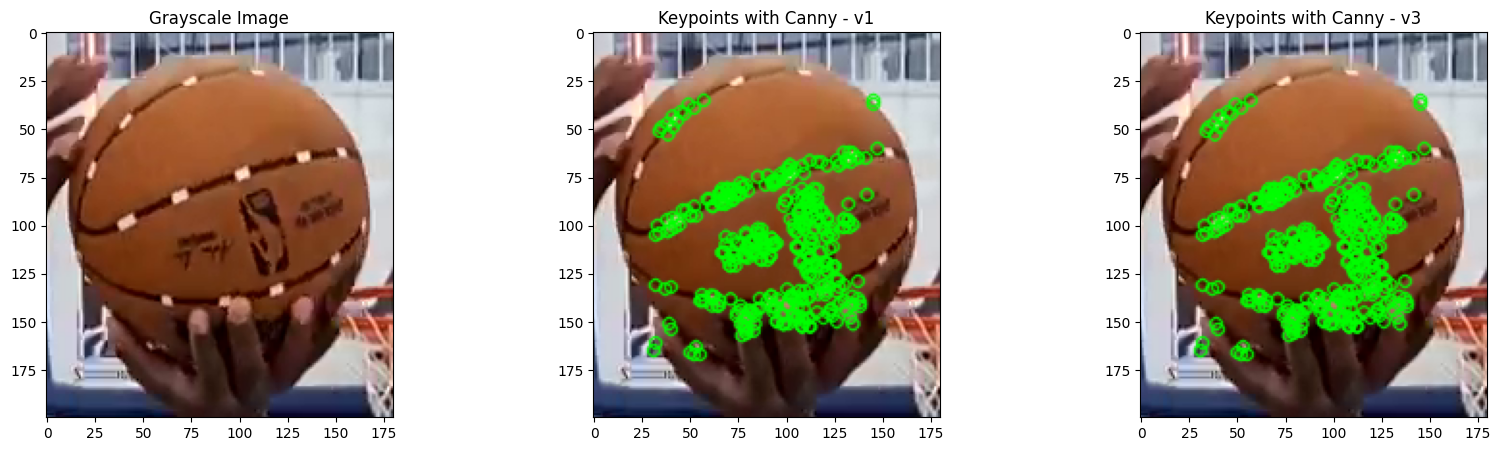

In [25]:
orb = cv2.ORB_create(nfeatures=500)

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = orb.detectAndCompute(edges1, None)
keypoints2, descriptors2 = orb.detectAndCompute(edges3, None)

# Draw the keypoints on the original images
img_with_keypoints1 = cv2.drawKeypoints(img1, keypoints1, None, color=(0, 255, 0), flags=0)
img_with_keypoints2 = cv2.drawKeypoints(img1, keypoints2, None, color=(0, 255, 0), flags=0)

# Display the images with keypoints and edges
# cv2_imshow(img_with_keypoints1)
# cv2_imshow(img_with_keypoints2)
f, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)); axs[0].set_title("Grayscale Image")
axs[1].imshow(cv2.cvtColor(img_with_keypoints1, cv2.COLOR_BGR2RGB)); axs[1].set_title("Keypoints with Canny - v1")
axs[2].imshow(cv2.cvtColor(img_with_keypoints1, cv2.COLOR_BGR2RGB)); axs[2].set_title("Keypoints with Canny - v3")
plt.show()